# Visión por Computadora 1
## TP 1 
## Alumno: Santiago Fux

In [2]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt


## Parte 1

### 1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

In [3]:
def to_chromatic_coords(input_image:np.ndarray) -> np.ndarray: 
    '''
    Argumentos
    img: Imagen de entrada
    ---------------------------------------
    Retorno
    Imagen: (numpy.ndarray) convertido a coordenadas cromaticas
    '''
    res = np.zeros((input_image.shape[0],input_image.shape[1], input_image.shape[2]))
    for i in range(input_image.shape[0]):
      for j in range(input_image.shape[1]):
        sum = np.sum(input_image[i][j])
        # handle potential error
        if sum == 0:
          sum = 1
        # divide pixel colors by its sum        
        res[i][j] = input_image[i][j] / sum
    return res

In [4]:
# read input images
img1 = cv.imread('coord_cromaticas/CoordCrom_1.png' ,cv.IMREAD_COLOR)
img2 = cv.imread('coord_cromaticas/CoordCrom_2.png' ,cv.IMREAD_COLOR)
img3 = cv.imread('coord_cromaticas/CoordCrom_3.png' ,cv.IMREAD_COLOR)

# convert from bgr -> rgb before showing
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)


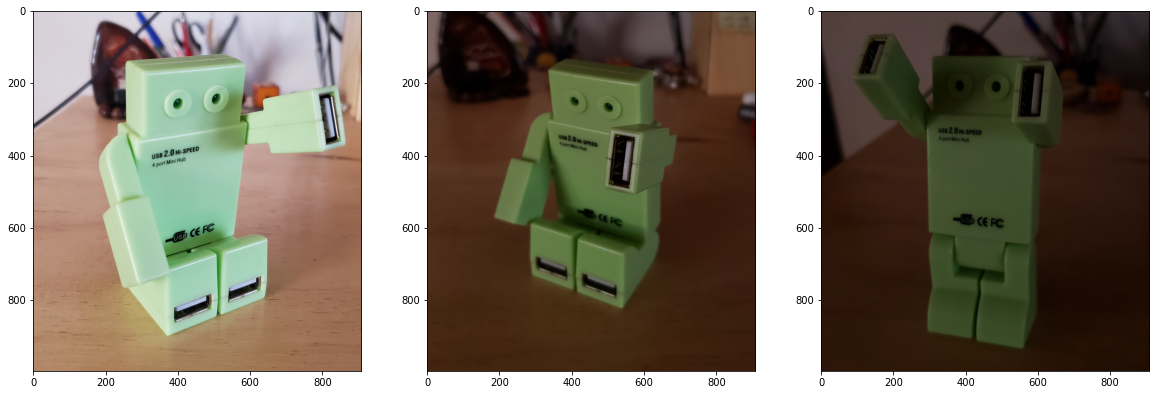

In [5]:
# show original images
plt.figure(figsize=(20,10))

plt.subplot(1, 3, 1)
plt.imshow(img1)
plt.subplot(1, 3, 2)
plt.imshow(img2)
plt.subplot(1, 3, 3)
plt.imshow(img3)

In [6]:
# convert images to chromatic coords
new_img1 = to_chromatic_coords(img1)
new_img2 = to_chromatic_coords(img2)
new_img3 = to_chromatic_coords(img3)

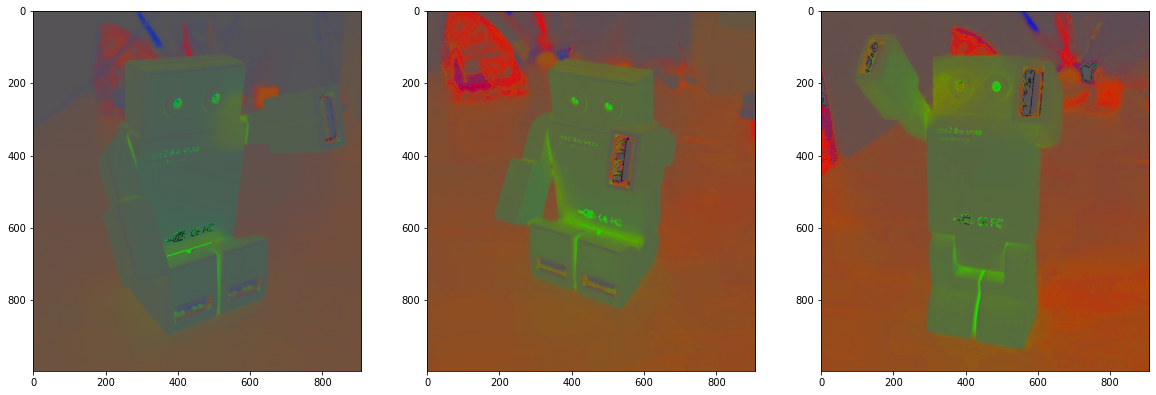

In [7]:
# show converted images
plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.imshow(new_img1)
plt.subplot(1, 3, 2)
plt.imshow(new_img2)
plt.subplot(1, 3, 3)
plt.imshow(new_img3)

### 2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

In [8]:
# create a function to convert image

def white_patch(input_image:np.ndarray) -> np.ndarray: 
    '''
    Argumentos
    img: Imagen de entrada
    ---------------------------------------
    Retorno
    Imagen: (numpy.ndarray) convertido a coordenadas cromaticas
    '''
    max = np.arange(3)
    max[0] = np.max(input_image[:, :, 0])
    max[1] = np.max(input_image[:, :, 1])
    max[2] = np.max(input_image[:, :, 2])

    res = np.zeros((input_image.shape[0],input_image.shape[1], input_image.shape[2]))

    for i in range(input_image.shape[0]):
      for j in range(input_image.shape[1]):
        for z in range(len(max)):
          if max[z] > 0:
            res[i][j][z] = int(((input_image[i][j][z] * 255) / max[z]))
          else:
            pass # DO NOT CONVERT
    return res.astype(np.uint8)



In [9]:
# read original images
img2_1 = cv.imread('white_patch/test_red.png' ,cv.IMREAD_COLOR)
img2_2 = cv.imread('white_patch/test_green.png' ,cv.IMREAD_COLOR)
img2_3 = cv.imread('white_patch/test_blue.png' ,cv.IMREAD_COLOR)

# convert from bgr -> rgb before showing
img2_1 = cv.cvtColor(img2_1, cv.COLOR_BGR2RGB)
img2_2 = cv.cvtColor(img2_2, cv.COLOR_BGR2RGB)
img2_3 = cv.cvtColor(img2_3, cv.COLOR_BGR2RGB)

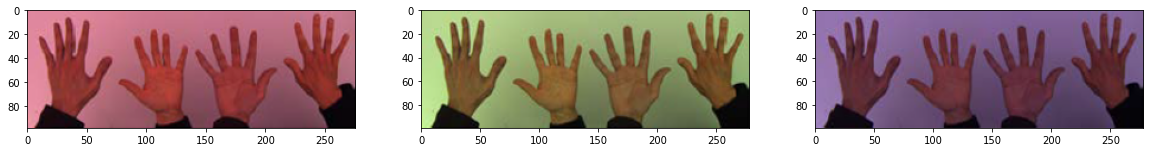

In [10]:
# show original images
plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.imshow(img2_1)
plt.subplot(1, 3, 2)
plt.imshow(img2_2)
plt.subplot(1, 3, 3)
plt.imshow(img2_3)

In [11]:
# apply white patch algorithm
new_img2_1 = white_patch(img2_1)
new_img2_2 = white_patch(img2_2)
new_img2_3 = white_patch(img2_3)

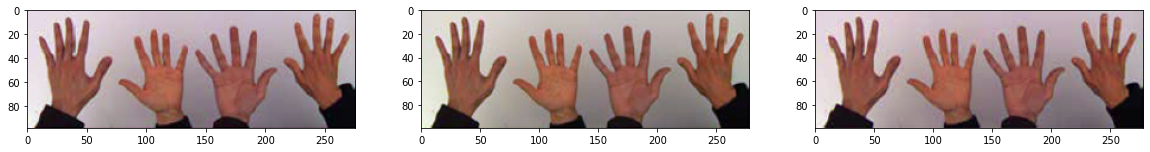

In [12]:
# show converted images
plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.imshow(new_img2_1)
plt.subplot(1, 3, 2)
plt.imshow(new_img2_2)
plt.subplot(1, 3, 3)
plt.imshow(new_img2_3)

__Conclusiones__: Se analizaron los resultados y se obtuvieron resultados similares para las 3 imágenes tratadas con el algoritmo de white patch. Dentro de la rutina implementada que el máximo valor obtenido no sea cero para evitar una excepción.

#### Aplico White Patch en la imagen de Depredador


In [13]:
# read original images
img2_4 = cv.imread('white_patch/wp_blue.jpg' ,cv.IMREAD_COLOR)
img2_5 = cv.imread('white_patch/wp_green.png' ,cv.IMREAD_COLOR)
img2_6 = cv.imread('white_patch/wp_green2.jpg' ,cv.IMREAD_COLOR)
img2_7 = cv.imread('white_patch/wp_red.png' ,cv.IMREAD_COLOR)
img2_8 = cv.imread('white_patch/wp_red2.jpg' ,cv.IMREAD_COLOR)

# convert from bgr -> rgb before showing
img2_4 = cv.cvtColor(img2_4, cv.COLOR_BGR2RGB)
img2_5 = cv.cvtColor(img2_5, cv.COLOR_BGR2RGB)
img2_6 = cv.cvtColor(img2_6, cv.COLOR_BGR2RGB)
img2_7 = cv.cvtColor(img2_7, cv.COLOR_BGR2RGB)
img2_8 = cv.cvtColor(img2_8, cv.COLOR_BGR2RGB)

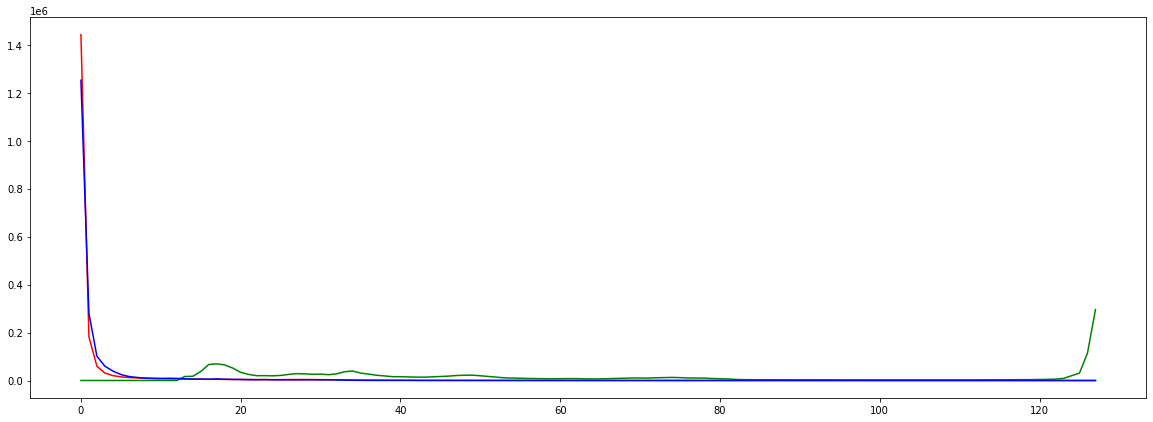

In [44]:
#debug


# obtengo su histograma
total_bins = 128

depredador_histR , depredador_binsR = np.histogram(img2_6[:,:,0].ravel(), total_bins, [0,256])
depredador_histG , depredador_binsG = np.histogram(img2_6[:,:,1].ravel(), total_bins, [0,256])
depredador_histB , depredador_binsB = np.histogram(img2_6[:,:,2].ravel(), total_bins, [0,256])
# visualizo los histogramas para cada canal
plt.figure(figsize=(20,7))
plt.plot(depredador_histR, color='r')
plt.plot(depredador_histG, color='g')
plt.plot(depredador_histB, color='b')


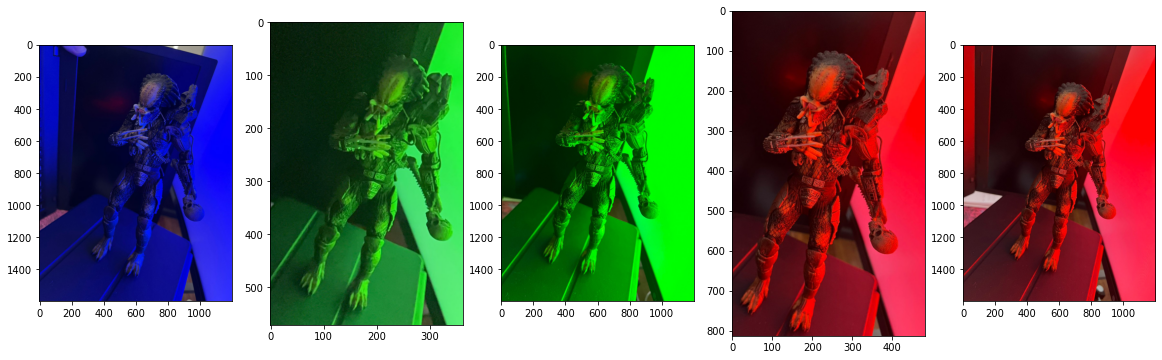

In [15]:
# show original images
plt.figure(figsize=(20,10))
plt.subplot(1, 5, 1)
plt.imshow(img2_4)
plt.subplot(1, 5, 2)
plt.imshow(img2_5)
plt.subplot(1, 5, 3)
plt.imshow(img2_6)
plt.subplot(1, 5, 4)
plt.imshow(img2_7)
plt.subplot(1, 5, 5)
plt.imshow(img2_8)

In [16]:
# apply white patch algorithm
new_img2_4 = white_patch(img2_4)
new_img2_5 = white_patch(img2_5)
new_img2_6 = white_patch(img2_6)
new_img2_7 = white_patch(img2_7)
new_img2_8 = white_patch(img2_8)

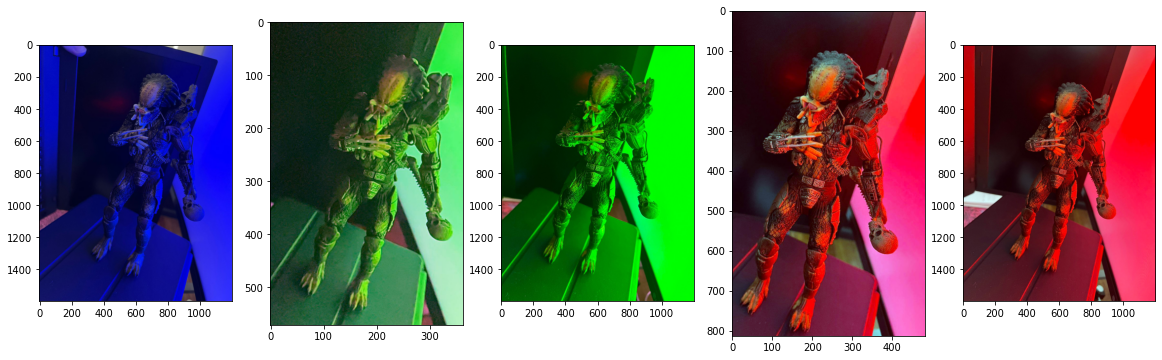

In [17]:
# show converted images
plt.figure(figsize=(20,10))
plt.subplot(1, 5, 1)
plt.imshow(new_img2_4)
plt.subplot(1, 5, 2)
plt.imshow(new_img2_5)
plt.subplot(1, 5, 3)
plt.imshow(new_img2_6)
plt.subplot(1, 5, 4)
plt.imshow(new_img2_7)
plt.subplot(1, 5, 5)
plt.imshow(new_img2_8)

__Conclusiones__: La mejora en estas imágenes no es tan significativa como en las imágenes de las manos debido a la elevada saturación en un color particular. Se recomienda reducir el contraste en el canal antes de llevar a cabo el white patch

In [66]:
# creamos una función para escalar cada canal rgb
def get_percentile(i, r_percent, g_percent, b_percent):

  res = i.copy()

  percentile = [
    np.percentile(res[:, :, 0], r_percent),
    np.percentile(res[:, :, 1], g_percent),
    np.percentile(res[:, :, 2], b_percent)
  ]

  for i in range(3):
    res_aux = res[:, :, i]
    res[:, :, i] = [x for x in res_aux if x < percentile[i] else 0]

  return res

In [78]:
r = np.array([1,2,3])

r = r[r < 2]
r.shape

(1,)

In [69]:
# aplicamos una corrección sobre un canal
img2_6_atten = get_percentile(img2_6, 100, 90, 100)

# img2_5_atten = cv.multiply(img2_5, cv.Scalar(1, 0.5, 1))
# img2_6_atten = cv.multiply(img2_6, cv.Scalar(1, 0.5, 1))
# img2_7_atten = cv.multiply(img2_7, cv.Scalar(0.5, 1, 1))
# img2_8_atten = cv.multiply(img2_8, cv.Scalar(0.5, 1, 1))


In [72]:
img2_6_atten[0:10,:,0]

array([[170, 170, 170, ..., 170, 170, 170],
       [170, 170, 170, ..., 170, 170, 170],
       [170, 170, 170, ..., 170, 170, 170],
       ...,
       [170, 170, 170, ..., 170, 170, 170],
       [170, 170, 170, ..., 170, 170, 170],
       [170, 170, 170, ..., 170, 170, 170]], dtype=uint8)

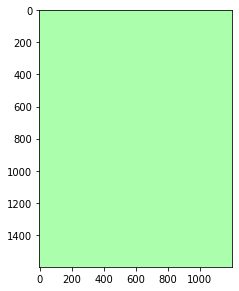

In [70]:

# show converted images
plt.figure(figsize=(20,10))
plt.subplot(1, 5, 1)
plt.imshow(img2_6_atten)
# plt.subplot(1, 5, 2)
# plt.imshow(new_img2_5)
# plt.subplot(1, 5, 3)
# plt.imshow(new_img2_6)
# plt.subplot(1, 5, 4)
# plt.imshow(new_img2_7)
# plt.subplot(1, 5, 5)
# plt.imshow(new_img2_8)


In [62]:
# apply white patch algorithm
new_img2_6_atten = white_patch(img2_6_atten)
# new_img2_5 = white_patch(img2_5)
# new_img2_6 = white_patch(img2_6)
# new_img2_7 = white_patch(img2_7)
# new_img2_8 = white_patch(img2_8)

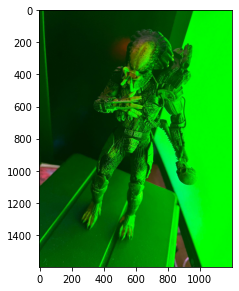

In [63]:

# show converted images
plt.figure(figsize=(20,10))
plt.subplot(1, 5, 1)
plt.imshow(new_img2_6_atten)
# plt.subplot(1, 5, 2)
# plt.imshow(new_img2_5)
# plt.subplot(1, 5, 3)
# plt.imshow(new_img2_6)
# plt.subplot(1, 5, 4)
# plt.imshow(new_img2_7)
# plt.subplot(1, 5, 5)
# plt.imshow(new_img2_8)

## Parte 2

### 1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.

In [23]:
# read images
img3_1 = cv.imread('img1_tp.png' ,cv.IMREAD_GRAYSCALE)
img3_2 = cv.imread('img2_tp.png' ,cv.IMREAD_GRAYSCALE)

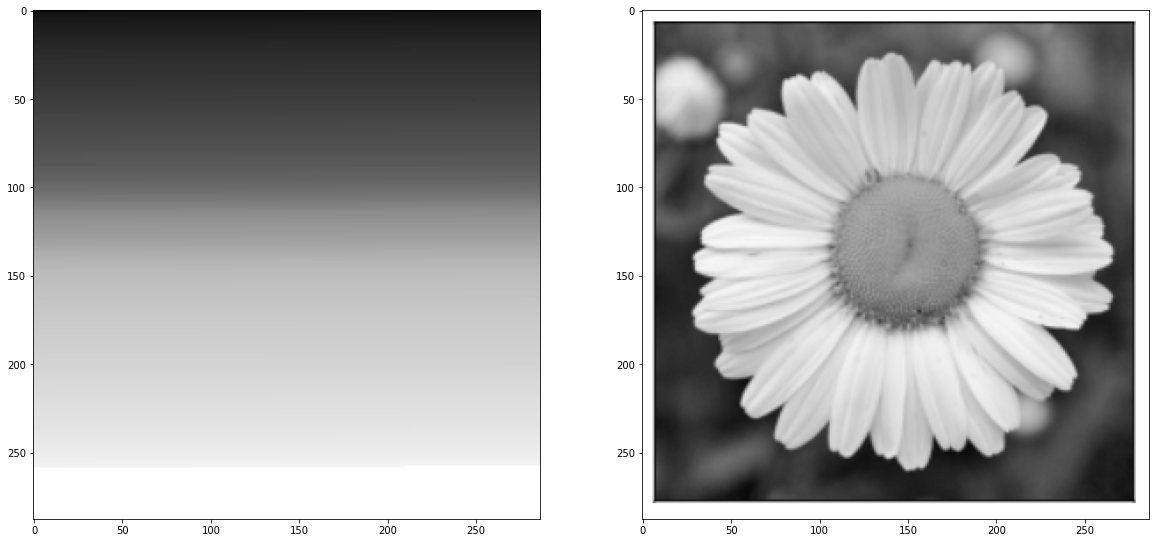

In [24]:
# show original images
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.imshow(img3_1, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(img3_2, cmap='gray')

### 2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. 
#### Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación

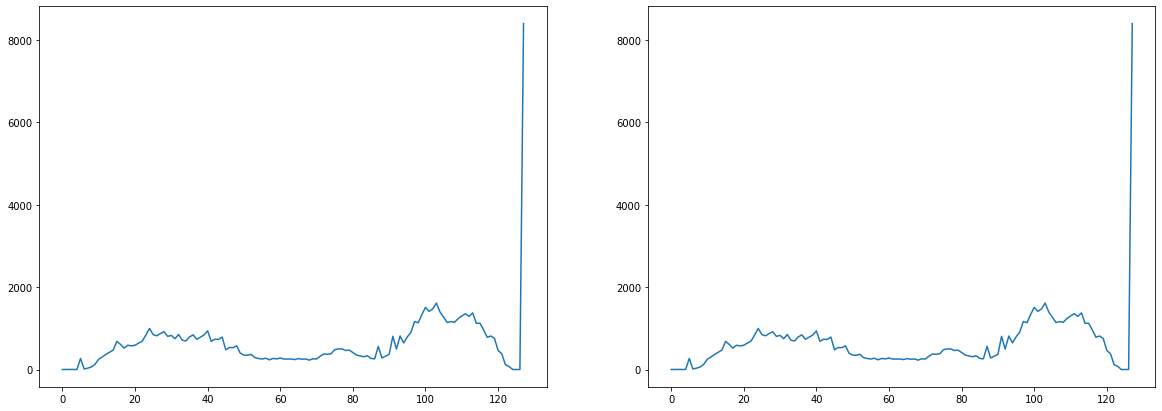

In [25]:
# select number of bins to show in the histogram and plot both images
total_bins = 128

hist1 , bins1 = np.histogram(img3_1.ravel(), total_bins, [0,256])
hist2, bins2 = np.histogram(img3_2.ravel(), total_bins, [0,256])

plt.figure(figsize=(20,7))
plt.subplot(1, 2, 1)
plt.plot(hist1)
plt.subplot(1, 2, 2)
plt.plot(hist2)

__Conclusión__: se observa que ambos histogramas son muy similares. En este caso la distribución de los diferentes niveles de gris coincide entra ambas imágenes, si bien las mismas no son similares.  
De todas formas, el histograma es un feature importante de información para entrenar un modelo de clasificador/detector dado que provee información muy valiosa y característica de la imagen.  

### 3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas

In [26]:
# read image
img4 = cv.imread('segmentacion.png' ,cv.IMREAD_COLOR)

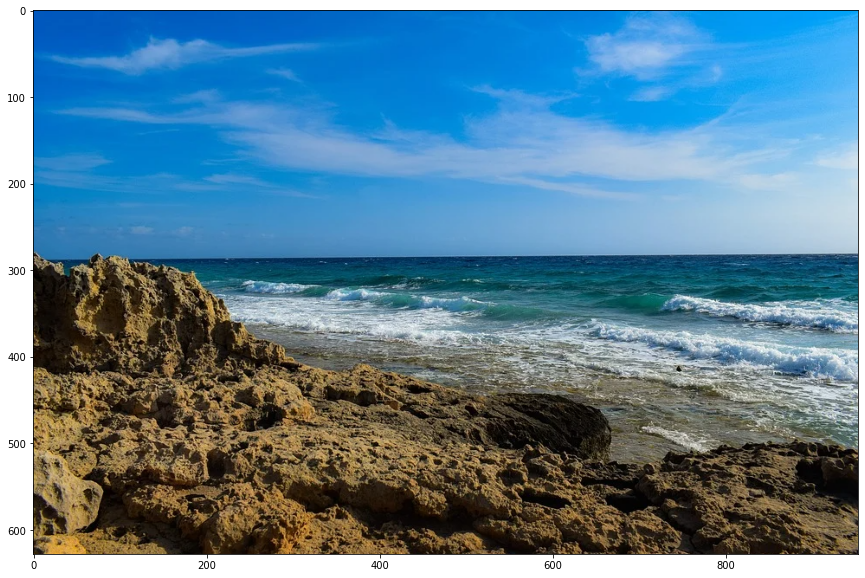

In [27]:
# plot original image
plt.figure(figsize=(20,10))
img4 = cv.cvtColor(img4, cv.COLOR_BGR2RGB)
plt.imshow(img4)

In [28]:
# obtengo su histograma
total_bins = 128

histR , binsR = np.histogram(img4[:,:,0].ravel(), total_bins, [0,256])
histG , binsG = np.histogram(img4[:,:,1].ravel(), total_bins, [0,256])
histB , binsB = np.histogram(img4[:,:,2].ravel(), total_bins, [0,256])


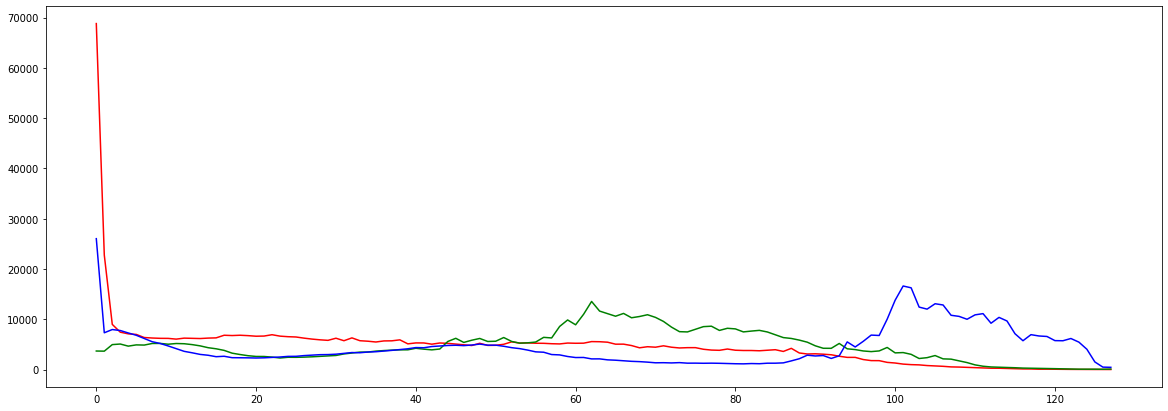

In [29]:
# visualizo los histogramas para cada canal
plt.figure(figsize=(20,7))
plt.plot(histR, color='r')
plt.plot(histG, color='g')
plt.plot(histB, color='b')

__Nota__: se observa que la componente azul predomina en las intensidades como consecuencia del cielo y el mar en la imagen. Mientras que la compoenente roja es la compoenente menos presente en la misma.

#### Tomamos muestras de agua, cielo y tierra para segmentar

In [30]:
# verifico tamaño de la imagen
img4.shape

(628, 953, 3)

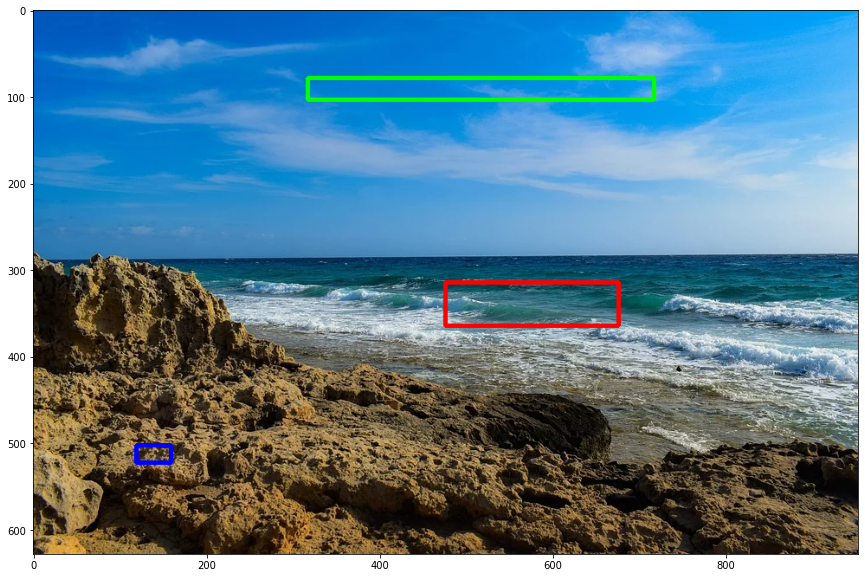

In [31]:
plt.figure(figsize=(20,10))

img4_seg = img4.copy()

#busco un area del agua y la dibujo en rojo
water_coord_x = int(img4_seg.shape[1] / 2)
water_coord_y = int(img4_seg.shape[0] / 2)
water_coord_width = 200
water_coord_height = 50
cv.rectangle(img4_seg,(water_coord_x, water_coord_y),(water_coord_x + water_coord_width, water_coord_y + water_coord_height),(255,0,0),3)

#busco un area del cielo y la dibujo en verde
sky_coord_x = int(img4_seg.shape[1] / 3)
sky_coord_y = int(img4_seg.shape[0] / 8)
sky_coord_width = 400
sky_coord_height = 25
cv.rectangle(img4_seg,(sky_coord_x, sky_coord_y),(sky_coord_x + sky_coord_width, sky_coord_y + sky_coord_height),(0,255,0),3)

#busco un area del suelo y la dibujo en azul
soil_coord_x = int(img4_seg.shape[1] / 8)
soil_coord_y = int(img4_seg.shape[0] * 4 / 5)
soil_coord_width = 40
soil_coord_height = 20
cv.rectangle(img4_seg,(soil_coord_x, soil_coord_y),(soil_coord_x + soil_coord_width, soil_coord_y + soil_coord_height),(0, 0, 255),3)

plt.imshow(img4_seg)

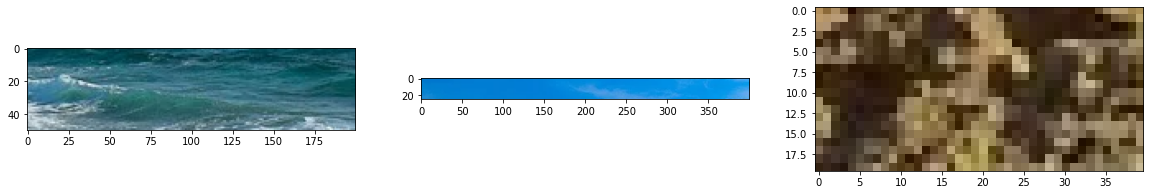

In [32]:
# visualizo los segmento elegidos por separado
water_segment = img4[water_coord_y : water_coord_y + water_coord_height, water_coord_x: water_coord_x + water_coord_width, :]
sky_segment = img4[sky_coord_y: sky_coord_y + sky_coord_height, sky_coord_x : sky_coord_x + sky_coord_width, :]
soil_segment = img4[soil_coord_y : soil_coord_y + soil_coord_height, soil_coord_x : soil_coord_x + soil_coord_width, :]

plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.imshow(water_segment)
plt.subplot(1, 3, 2)
plt.imshow(sky_segment)
plt.subplot(1, 3, 3)
plt.imshow(soil_segment)
plt.show()

In [33]:
#calculo la media y los desvios para cada uno de los segmentos
water_mean, water_std = cv.meanStdDev(water_segment)
sky_mean, sky_std = cv.meanStdDev(sky_segment)
soil_mean, soil_std = cv.meanStdDev(soil_segment)

In [34]:
# construimos las mascaras para cada uno de los elementos
n_sigma = 2
water_range = cv.inRange(img4, water_mean - water_std * n_sigma,  water_mean + water_std * n_sigma)
water_mask = cv.bitwise_and(img4, img4, mask= water_range)

sky_range = cv.inRange(img4, sky_mean - sky_std * n_sigma,  sky_mean + sky_std * n_sigma)
sky_mask = cv.bitwise_and(img4, img4, mask= sky_range)

soil_range = cv.inRange(img4, soil_mean - soil_std * n_sigma,  soil_mean + soil_std * n_sigma)
soil_mask = cv.bitwise_and(img4, img4, mask= soil_range)

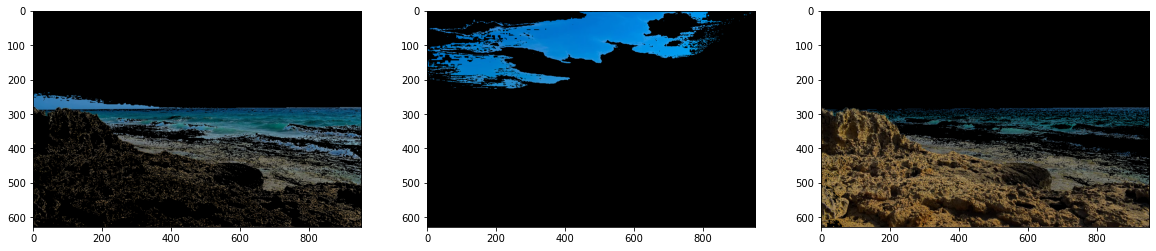

In [35]:
#visualizo las mascaras
plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.imshow(water_mask)
plt.subplot(1, 3, 2)
plt.imshow(sky_mask)
plt.subplot(1, 3, 3)
plt.imshow(soil_mask)
plt.show()

In [36]:
# intentamos con HSV
# Pasamos la imagen a HSV y calculo el color de muestra
#------------------------------------------------------
img4_hsv = cv.cvtColor(img4, cv.COLOR_RGB2HSV)


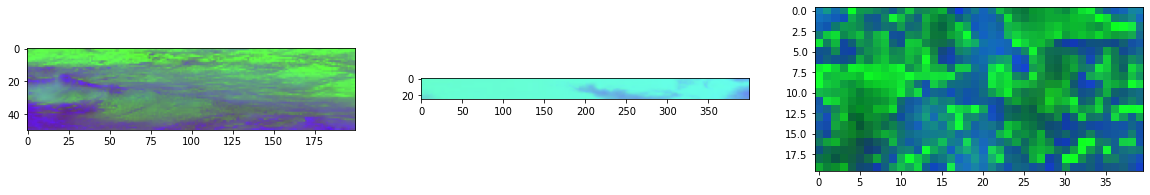

In [37]:

# visualizo los segmento elegidos por separado
water_segment_hsv = img4_hsv[water_coord_y : water_coord_y + water_coord_height, water_coord_x: water_coord_x + water_coord_width, :]
sky_segment_hsv = img4_hsv[sky_coord_y: sky_coord_y + sky_coord_height, sky_coord_x : sky_coord_x + sky_coord_width, :]
soil_segment_hsv = img4_hsv[soil_coord_y : soil_coord_y + soil_coord_height, soil_coord_x : soil_coord_x + soil_coord_width, :]

plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.imshow(water_segment_hsv)
plt.subplot(1, 3, 2)
plt.imshow(sky_segment_hsv)
plt.subplot(1, 3, 3)
plt.imshow(soil_segment_hsv)
plt.show()



In [38]:
#calculo la media y los desvios para cada uno de los segmentos
water_mean_hsv = cv.mean(water_segment_hsv)
sky_mean_hsv  = cv.mean(sky_segment_hsv)
soil_mean_hsv = cv.mean(soil_segment_hsv)

In [39]:
#imprimo los valores medios
water_mean_hsv, sky_mean_hsv, soil_mean_hsv

((95.6995, 147.9922, 121.52550000000001, 0.0),
 (101.8529, 242.7357, 221.51180000000002, 0.0),
 (16.79, 138.76625, 99.17, 0.0))

In [40]:
water_color_l = (93, 98, 100)
water_color_h = (100,255,255)

sky_color_l = (98, 102, 100)
sky_color_h = (105,255,255)

soil_color_l = (11, 100, 100)
soil_color_h = (21,255,255)


In [41]:
# construimos las mascaras para cada uno de los elementos
n_sigma = 2
water_range_hsv = cv.inRange(img4_hsv, water_color_l,  water_color_h)
water_mask_hsv = cv.bitwise_and(img4, img4, mask= water_range_hsv)

sky_range_hsv = cv.inRange(img4_hsv, sky_color_l,  sky_color_h)
sky_mask_hsv = cv.bitwise_and(img4, img4, mask= sky_range_hsv)

soil_range_hsv = cv.inRange(img4_hsv, soil_color_l,  soil_color_h)
soil_mask_hsv = cv.bitwise_and(img4, img4, mask= soil_range_hsv)

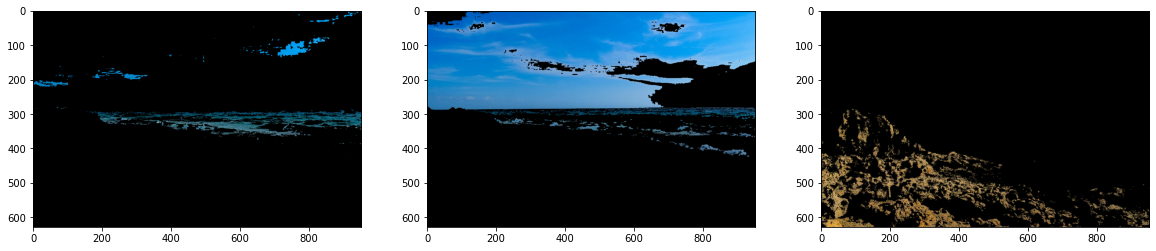

In [42]:
#visualizo las mascaras
plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.imshow(water_mask_hsv)
plt.subplot(1, 3, 2)
plt.imshow(sky_mask_hsv)
plt.subplot(1, 3, 3)
plt.imshow(soil_mask_hsv)
plt.show()